# IBM Data Science Capstone project

### Objective of the project:

##### Pick a best location in Bengaluru city to open a bar

  

In [1]:
import pandas as pd
import numpy as np
import folium
import json
import requests
from pandas.io.json import json_normalize

In [2]:
pip install opencage

In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
CLIENT_ID = '3TDD2VJOVJNNOTIAKFFKFMVQCKB25FO0331FSNGDESWTV04J' # your Foursquare ID
CLIENT_SECRET = '0GNGCMLQOOF1EHCA52TE3J1RSYCWMZM0HYWZKK5CXPQKNRJO' # your Foursquare Secret
VERSION = '20201220'

### Bengaluru Co-ordinates

In [6]:
latitude = 12.9716
longitude = 77.5946
LIMIT = 1000
radius = 10000

### Function to get categories of particular venue

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Function to retrieve the location of venues using geocoder package

In [8]:
from opencage.geocoder import OpenCageGeocode
from geopy.exc import GeocoderTimedOut
geolocator = OpenCageGeocode('e86c7fd5ff56460c80de34867e20a107')
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [9]:
import requests
response = requests.get('http://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore')

In [10]:
#create dataframe with "neighborhood","latitude","longitude" as columns

data = pd.DataFrame(columns = ["neighborhood","latitude","longitude"])

### Webscraping a wikipedia page 

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,'html.parser') #read text from the URL
tables = soup.findAll("table")                    #read data in tag "table"
#print(tbody)
table_data_list = []
for table in tables:
    table_data = table.findAll('tr')              #read data in each row of table
    del table_data[0]
    table_data_list.append(table_data)

for table_data in table_data_list:
    for row in table_data:
        try:
            neighborhood = row.find('a').text
            location = do_geocode('{},{}'.format(neighborhood,"Karnataka")) #get location(json format) of neighborhood
            latitude = (location[0]['geometry']['lat'])  #get latitude(json format) of neighborhood
            longitude = (location[0]['geometry']['lng']) #get latitude(json format) of neighborhood
            data = data.append({'neighborhood' :neighborhood,'latitude':latitude,'longitude':longitude},ignore_index =True)#append data to dataframe
        except:
            continue          

In [12]:
data.shape

(71, 3)

In [13]:
data.drop_duplicates()

,neighborhood,latitude,longitude
0,Cantonment,12.993687,77.598000
1,Domlur,12.962467,77.638196
2,Indiranagar,12.973291,77.640467
3,Jeevanbheemanagar,14.666670,75.833330
4,Malleswaram,13.002735,77.570325
...,...,...,...
63,Rajarajeshwari Nagar,12.927441,77.515522
64,Vijayanagar,12.971889,77.545789
65,Doddaballapura,13.292958,77.543146
67,Magadi,12.956735,77.224228


In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for venue in results:
            venues_list.append((
            name,
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

    venues_df = pd.DataFrame(venues_list)
    venues_df.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude','Venue Category']
    
    return(venues_df)                                 

In [16]:
venues_df = getNearbyVenues(names=data['neighborhood'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )

Cantonment
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Pete
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur
Basaveshwaranagar
Kamakshipalya
Kengeri
Mahalakshmi Layout
Nagarbhavi
Nandini Layout
Nayandahalli
Rajajinagar
Rajarajeshwari Nagar
Vijayanagar
Doddaballapura
Doddaballapura
Magadi
Bidadi
Magadi
Bidadi


In [17]:
venues_df.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment,12.993687,77.598,Infinitea,12.987157,77.594835,Tea Room
1,Cantonment,12.993687,77.598,Millers 46,12.991666,77.594207,Steakhouse
2,Cantonment,12.993687,77.598,Ujwal Bar & Restaurant,12.992280,77.594473,Indian Restaurant
3,Cantonment,12.993687,77.598,Taj West End,12.984572,77.584893,Hotel
4,Cantonment,12.993687,77.598,Cubbon Park,12.977042,77.595277,Park


In [18]:
venues_df.groupby(["Neighborhood"]).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anjanapura,8,8,8,8,8,8
Arekere,100,100,100,100,100,100
BTM Layout,100,100,100,100,100,100
Banashankari,9,9,9,9,9,9
Banaswadi,100,100,100,100,100,100
...,...,...,...,...,...,...
Vidyaranyapura,4,4,4,4,4,4
Vijayanagar,100,100,100,100,100,100
Whitefield,100,100,100,100,100,100


### Find number of unique categories

In [19]:
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))

There are 159 uniques categories.


### print out first 50 categories

In [20]:
venues_df['Venue Category'].unique()

array(['Tea Room', 'Steakhouse', 'Indian Restaurant', 'Hotel', 'Park',
       'American Restaurant', 'Cricket Ground', 'Ice Cream Shop',
       'Afghan Restaurant', 'Deli / Bodega', 'Shopping Mall', 'Lounge',
       'Plaza', 'Pub', 'Japanese Restaurant', 'Burger Joint', 'Nightclub',
       'BBQ Joint', 'Sushi Restaurant', 'Snack Place',
       'Italian Restaurant', 'Café', 'Breakfast Spot', 'Brewery',
       'Bookstore', 'Gym', 'Seafood Restaurant', 'Cocktail Bar',
       'Department Store', 'Coffee Shop', "Women's Store",
       'Asian Restaurant', 'Mexican Restaurant', 'Dessert Shop',
       'Andhra Restaurant', 'Bakery', 'South Indian Restaurant',
       'Boutique', 'Multiplex', 'Market', 'Spa', 'Sandwich Place',
       'Bowling Alley', 'Gaming Cafe', 'Chocolate Shop',
       'Botanical Garden', 'Gym / Fitness Center', 'Restaurant',
       'Fast Food Restaurant', 'Financial or Legal Service',
       'Movie Theater', 'Butcher', 'Clothing Store', 'Yoga Studio',
       'Mobile Phone Sh

In [21]:
# one hot encoding
blr_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
blr_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

print(blr_onehot.shape)
blr_onehot.head()


(5735, 160)


,Neighborhoods,ATM,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,...,Theme Park Ride / Attraction,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vineyard,Women's Store,Yoga Studio,Zoo
0,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
blr_grouped = blr_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(blr_grouped.shape)
blr_grouped

(68, 160)


,Neighborhoods,ATM,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,...,Theme Park Ride / Attraction,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vineyard,Women's Store,Yoga Studio,Zoo
0,Anjanapura,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.250000,0.000000,0.00,0.0,0.00,0.00,0.0
1,Arekere,0.0,0.00,0.00,0.0,0.01,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.01,0.0
2,BTM Layout,0.0,0.00,0.00,0.0,0.01,0.00,0.0,0.0,0.01,...,0.0,0.01,0.00,0.000000,0.000000,0.00,0.0,0.00,0.01,0.0
3,Banashankari,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.111111,0.111111,0.00,0.0,0.00,0.00,0.0
4,Banaswadi,0.0,0.01,0.00,0.0,0.01,0.01,0.0,0.0,0.03,...,0.0,0.01,0.00,0.000000,0.000000,0.00,0.0,0.01,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Vidyaranyapura,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.00,0.000000,0.000000,0.00,0.0,0.00,0.00,0.0
64,Vijayanagar,0.0,0.01,0.00,0.0,0.01,0.00,0.0,0.0,0.01,...,0.0,0.00,0.00,0.000000,0.000000,0.01,0.0,0.00,0.00,0.0
65,Whitefield,0.0,0.00,0.00,0.0,0.02,0.01,0.0,0.0,0.00,...,0.0,0.01,0.00,0.000000,0.000000,0.01,0.0,0.00,0.00,0.0
66,Yelahanka,0.0,0.00,0.01,0.0,0.01,0.00,0.0,0.0,0.00,...,0.0,0.00,0.01,0.010000,0.000000,0.01,0.0,0.00,0.00,0.0


In [23]:
len(blr_grouped[blr_grouped["Bar"] > 0])

20

In [24]:
blr_bar = blr_grouped[["Neighborhoods","Bar"]]

In [25]:
blr_bar.head()

,Neighborhoods,Bar
0,Anjanapura,0.0
1,Arekere,0.0
2,BTM Layout,0.0
3,Banashankari,0.0
4,Banaswadi,0.0


c:\users\admin\miniconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
c:\users\admin\miniconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
c:\users\admin\miniconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
c:\users\admin\miniconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
c:\users\admin\miniconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of disti

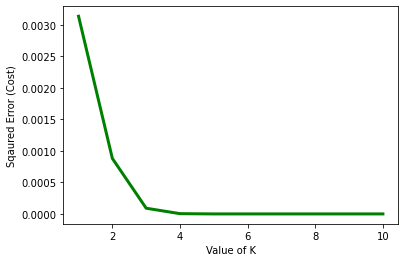

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

blr_clustering = blr_bar.drop(["Neighborhoods"], 1)
cost =[]

for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 50) 
    KM.fit(blr_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  #plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

### From above graph 3 is optimal number for k

In [27]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 3

blr_clustering = blr_bar.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blr_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [28]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
blr_merged = blr_bar.copy()

# add clustering labels
blr_merged["Cluster Labels"] = kmeans.labels_

In [29]:
blr_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
blr_merged.head()

,Neighborhood,Bar,Cluster Labels
0,Anjanapura,0.0,0
1,Arekere,0.0,0
2,BTM Layout,0.0,0
3,Banashankari,0.0,0
4,Banaswadi,0.0,0


In [30]:
blr_merged = blr_merged.join(data.set_index("neighborhood"), on="Neighborhood")

print(blr_merged.shape)
blr_merged.head() # check the last columns!

(71, 5)


,Neighborhood,Bar,Cluster Labels,latitude,longitude
0,Anjanapura,0.0,0,12.684704,77.271172
1,Arekere,0.0,0,12.887209,77.596049
2,BTM Layout,0.0,0,12.915177,77.610282
3,Banashankari,0.0,0,15.887678,75.704678
4,Banaswadi,0.0,0,13.014162,77.651854


In [31]:
#sort the results by Cluster Labels
print(blr_merged.shape)
blr_merged.sort_values(["Cluster Labels"], inplace=True)
blr_merged

(71, 5)


,Neighborhood,Bar,Cluster Labels,latitude,longitude
0,Anjanapura,0.000000,0,12.684704,77.271172
29,Jeevanbheemanagar,0.000000,0,14.666670,75.833330
30,Kalyan Nagar,0.000000,0,13.022142,77.640337
31,Kamakshipalya,0.000000,0,12.982362,77.522638
32,Kammanahalli,0.000000,0,13.009346,77.637709
...,...,...,...,...,...
24,Hulimavu,0.010000,1,12.877349,77.602803
67,Yeshwanthpur,0.010000,1,13.021835,77.547686
16,Electronic City,0.030000,2,37.632091,-0.699485
65,Whitefield,0.020000,2,12.969637,77.749745


In [32]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['latitude'], blr_merged['longitude'], blr_merged['Neighborhood'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0]

,Neighborhood,Bar,Cluster Labels,latitude,longitude
0,Anjanapura,0.0,0,12.684704,77.271172
29,Jeevanbheemanagar,0.0,0,14.666670,75.833330
30,Kalyan Nagar,0.0,0,13.022142,77.640337
31,Kamakshipalya,0.0,0,12.982362,77.522638
32,Kammanahalli,0.0,0,13.009346,77.637709
34,Koramangala,0.0,0,13.292399,77.751926
37,Kumaraswamy Layout,0.0,0,12.908149,77.555318
38,Lingarajapuram,0.0,0,13.011768,77.627829
39,Madiwala,0.0,0,12.921227,77.617951
40,Magadi,0.0,0,12.956735,77.224228


In [35]:
blr_merged.loc[blr_merged['Cluster Labels'] == 1]


,Neighborhood,Bar,Cluster Labels,latitude,longitude
7,Begur,0.01,1,12.863389,77.613011
61,Varthur,0.01,1,12.940615,77.746994
55,Ramamurthy Nagar,0.01,1,13.012022,77.677782
6,Basaveshwaranagar,0.01,1,12.993757,77.539132
47,Nandini Layout,0.01,1,13.010406,77.537803
50,Peenya,0.01,1,13.032942,77.527325
45,Mathikere,0.01,1,13.032888,77.557374
43,Malleswaram,0.01,1,13.002735,77.570325
42,Mahalakshmi Layout,0.01,1,13.011315,77.544697
41,Mahadevapura,0.01,1,12.993498,77.692416


In [36]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2]

,Neighborhood,Bar,Cluster Labels,latitude,longitude
16,Electronic City,0.030000,2,37.632091,-0.699485
65,Whitefield,0.020000,2,12.969637,77.749745
11,Bommasandra,0.032787,2,12.816244,77.691611


## Observations
 
### Above cluster 2 is satisfactory as it agrees with real world Electronic city Whitefield has more bars 

### Electronic city and Whitefield are neighborhoods where more IT companies more concentrated

### Conclusion

Bars in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of bars
On the other hand, cluster 0  has very low number to totally no shopping mall in the neighborhoods
Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 1 with moderate competition
Therefore, this project recommends property developers to capitalize on these findings to open new shopping malls in neighborhoods in cluster 1 with little competition.
